In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import statsmodels.api as sm
import datetime

In [2]:
data=pd.read_csv('F://challenge_data_20.csv');

In [3]:
data.head()

,time,operating_hours,fuel_consumption(liter),engine_id
0,2017-12-19,3726,3404.8,8331744407
1,2017-12-20,3746,3865.6,8331744407
2,2017-12-21,3748,3891.2,8331744407
3,2017-12-22,3768,3840.0,8331744407
4,2017-12-23,3776,3891.2,8331744407


In [4]:
# data["time"]=pd.to_datetime(data["time"]);
groups=data.groupby(['engine_id'])
keys = list(groups.groups.keys())


In [5]:
keys

[2159359786,
 2582458400,
 2654264148,
 3308150982,
 3413759796,
 3643747759,
 3850565523,
 4569859790,
 5246759857,
 5452766296,
 5452799100,
 5452799200,
 5452799300,
 5452799400,
 5687959787,
 7133245688,
 7940559597,
 8331744407,
 8481959000,
 8711753003]

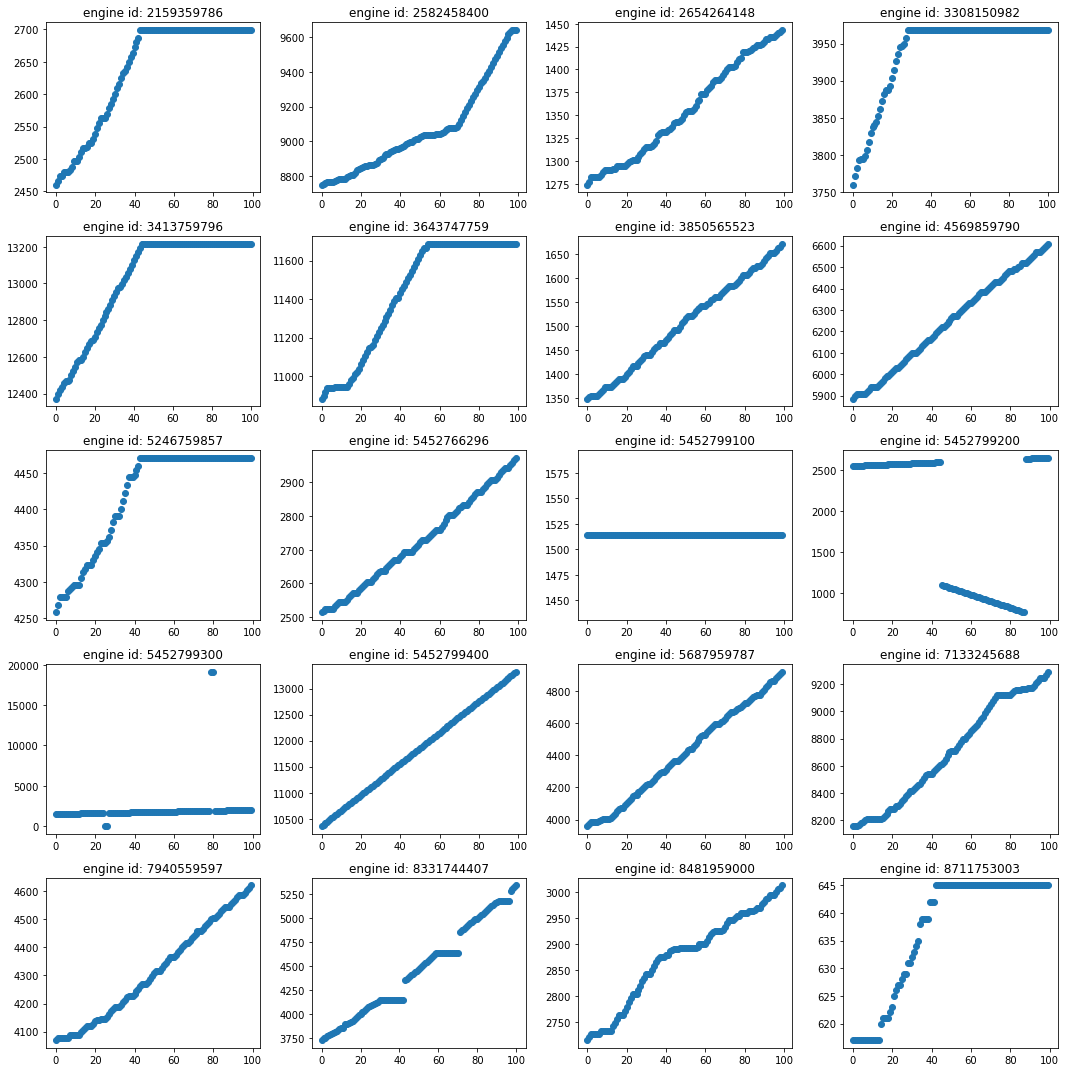

In [6]:
myFmt = mdates.DateFormatter('%d')
fig, axs = plt.subplots(5, 4,figsize=(15,15));
number=0;
for i in range(5):
    for j in range(4):
        fig.tight_layout()
        df=groups.get_group(keys[number])
        days=np.arange(len(df['operating_hours']));
        axs[i,j].scatter(days,df['operating_hours']);
        axs[i,j].set_title('engine id: '+str(keys[number]));
        number+=1;

        

# forecasting

some engines showing constant value of operating hours after some days, so for that engines we are not fitting any model. just take that constat value. 
other engines showing linear relationship so here we are trying linear regression.

1. engine id 2582458400 showing two linear trends. up to initial 70 days it is following one trend and then slope is slightly increased.
so for forecasting we are using data after 70 days from 20-12-2017.

In [7]:
df=groups.get_group(keys[1])
y=df['operating_hours'];
y=y[70:];
x1=np.arange(70,70+len(y));
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        operating_hours   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     6844.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           5.21e-35
Time:                        05:51:19   Log-Likelihood:                -114.02
No. Observations:                  30   AIC:                             232.0
Df Residuals:                      28   BIC:                             234.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7745.7878     20.074    385.856      0.000    7704.667    7786.908
x1            19.5508      0.236     82.727      0.000      19.067      20.035
==============================================================================
Omnibus:                       29.652   Durbin-Watson:                   0.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.401
Skew:                          -2.157   Prob(JB):                     1.04e-14
Kurtosis:                       8.736   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
intercept=results.params[0];
slop=results.params[1];

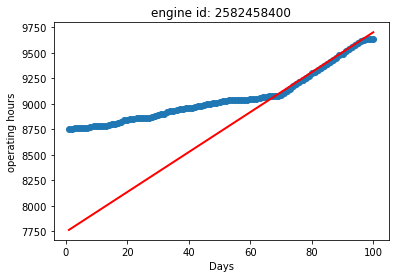

In [9]:
y=df['operating_hours'];
x1=np.arange(1,len(y)+1)
plt.scatter(x1,y);
plt.plot(x1,slop*x1+intercept,lw=2,c='red')
plt.xlabel('Days')
plt.ylabel('operating hours')
plt.title('engine id: '+str(keys[1]))
plt.show()

In [10]:
forecast=pd.DataFrame({});
forecast['time']=['30-03-2018','31-03-2018','01-04-2018','02-04-2018','03-04-2018','04-04-2018','05-04-2018','06-04-2018','07-04-2018','08-04-2018'
,'09-04-2018','10-04-2018','11-04-2018','12-04-2018','13-04-2018']

In [11]:
X_forecast=np.arange(x1[-1],x1[-1]+15);

In [12]:
forecast['operation_hour']=X_forecast*slop+intercept

In [13]:
forecast['engine_id']=keys[1]

In [14]:
forecast

,time,operation_hour,engine_id
0,30-03-2018,9700.871264,2582458400
1,31-03-2018,9720.422099,2582458400
2,01-04-2018,9739.972933,2582458400
3,02-04-2018,9759.523767,2582458400
4,03-04-2018,9779.074601,2582458400
5,04-04-2018,9798.625436,2582458400
6,05-04-2018,9818.176270,2582458400
7,06-04-2018,9837.727104,2582458400
8,07-04-2018,9857.277938,2582458400
9,08-04-2018,9876.828773,2582458400


# forecast for engine id  2654264148 

In [15]:
k=keys[2]
print('engine_id '+str(k))
df=groups.get_group(k)
y=df['operating_hours'];
x1=np.arange(1,len(y)+1);
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

engine_id 2654264148


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        operating_hours   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9250.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           8.16e-99
Time:                        05:51:22   Log-Likelihood:                -311.38
No. Observations:                 100   AIC:                             626.8
Df Residuals:                      98   BIC:                             632.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1262.8170      1.109   1139.167      0.000    1260.617    1265.017
x1             1.8329      0.019     96.178      0.000       1.795       1.871
==============================================================================
Omnibus:                        7.031   Durbin-Watson:                   0.087
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                3.992
Skew:                           0.292   Prob(JB):                        0.136
Kurtosis:                       2.214   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

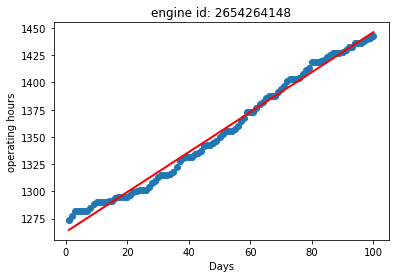

In [16]:
intercept=results.params[0];
slop=results.params[1];
y=df['operating_hours'];
x1=np.arange(1,len(y)+1)
plt.scatter(x1,y);
plt.plot(x1,slop*x1+intercept,lw=2,c='red')
plt.xlabel('Days')
plt.ylabel('operating hours')
plt.title('engine id: '+str(k))
plt.show()

In [17]:
f1=pd.DataFrame({});
f1['time']=['30-03-2018','31-03-2018','01-04-2018','02-04-2018','03-04-2018','04-04-2018','05-04-2018','06-04-2018','07-04-2018','08-04-2018'
,'09-04-2018','10-04-2018','11-04-2018','12-04-2018','13-04-2018']
X_forecast=np.arange(x1[-1],x1[-1]+15);
f1['operation_hour']=X_forecast*slop+intercept
f1['engine_id']=k
forecast=forecast.append(f1,ignore_index=True)

# forecast for engine id 3850565523

In [18]:
k=keys[6]
print('engine_id '+str(k))
df=groups.get_group(k)
y=df['operating_hours'];
x1=np.arange(1,len(y)+1);
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

engine_id 3850565523


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        operating_hours   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.331e+04
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          1.71e-131
Time:                        05:51:23   Log-Likelihood:                -294.32
No. Observations:                 100   AIC:                             592.6
Df Residuals:                      98   BIC:                             597.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1336.3588      0.935   1429.812      0.000    1334.504    1338.214
x1             3.3440      0.016    208.115      0.000       3.312       3.376
==============================================================================
Omnibus:                        2.700   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.259   Jarque-Bera (JB):                2.703
Skew:                           0.381   Prob(JB):                        0.259
Kurtosis:                       2.739   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

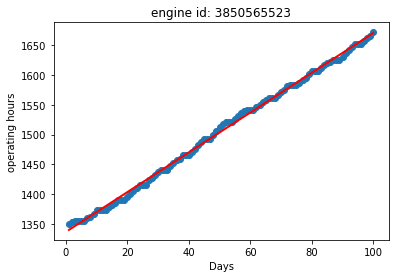

In [19]:
intercept=results.params[0];
slop=results.params[1];
y=df['operating_hours'];
x1=np.arange(1,len(y)+1)
plt.scatter(x1,y);
plt.plot(x1,slop*x1+intercept,lw=2,c='red')
plt.xlabel('Days')
plt.ylabel('operating hours')
plt.title('engine id: '+str(k))
plt.show()

In [20]:
f1=pd.DataFrame({});
f1['time']=['30-03-2018','31-03-2018','01-04-2018','02-04-2018','03-04-2018','04-04-2018','05-04-2018','06-04-2018','07-04-2018','08-04-2018'
,'09-04-2018','10-04-2018','11-04-2018','12-04-2018','13-04-2018']
X_forecast=np.arange(x1[-1],x1[-1]+15);
f1['operation_hour']=X_forecast*slop+intercept
f1['engine_id']=k
forecast=forecast.append(f1,ignore_index=True)

# forecast for engine_id 4569859790

In [21]:
k=keys[7]
print('engine_id '+str(k))
df=groups.get_group(k)
y=df['operating_hours'];
x1=np.arange(1,len(y)+1);
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

engine_id 4569859790


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        operating_hours   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.762e+04
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          1.68e-128
Time:                        05:51:23   Log-Likelihood:                -383.33
No. Observations:                 100   AIC:                             770.7
Df Residuals:                      98   BIC:                             775.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5860.8358      2.276   2574.665      0.000    5856.318    5865.353
x1             7.5904      0.039    193.958      0.000       7.513       7.668
==============================================================================
Omnibus:                       15.255   Durbin-Watson:                   0.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.366
Skew:                           0.040   Prob(JB):                        0.113
Kurtosis:                       1.980   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

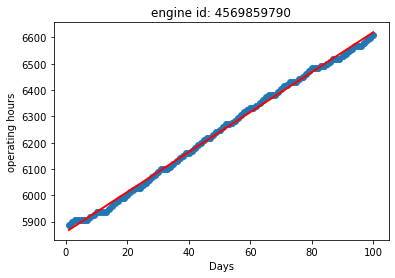

In [22]:
intercept=results.params[0];
slop=results.params[1];
y=df['operating_hours'];
x1=np.arange(1,len(y)+1)
plt.scatter(x1,y);
plt.plot(x1,slop*x1+intercept,lw=2,c='red')
plt.xlabel('Days')
plt.ylabel('operating hours')
plt.title('engine id: '+str(k))
plt.show()
f1=pd.DataFrame({});
f1['time']=['30-03-2018','31-03-2018','01-04-2018','02-04-2018','03-04-2018','04-04-2018','05-04-2018','06-04-2018','07-04-2018','08-04-2018'
,'09-04-2018','10-04-2018','11-04-2018','12-04-2018','13-04-2018']
X_forecast=np.arange(x1[-1],x1[-1]+15);
f1['operation_hour']=X_forecast*slop+intercept
f1['engine_id']=k
forecast=forecast.append(f1,ignore_index=True)

# forecast for engine_id 5452766296

In [23]:
k=keys[9]
print('engine_id '+str(k))
df=groups.get_group(k)
y=df['operating_hours'];
x1=np.arange(1,len(y)+1);
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

engine_id 5452766296


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        operating_hours   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.976e+04
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          1.59e-123
Time:                        05:51:24   Log-Likelihood:                -346.97
No. Observations:                 100   AIC:                             697.9
Df Residuals:                      98   BIC:                             703.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2489.3352      1.582   1573.081      0.000    2486.195    2492.475
x1             4.6928      0.027    172.496      0.000       4.639       4.747
==============================================================================
Omnibus:                        3.460   Durbin-Watson:                   0.192
Prob(Omnibus):                  0.177   Jarque-Bera (JB):                2.904
Skew:                           0.403   Prob(JB):                        0.234
Kurtosis:                       3.214   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

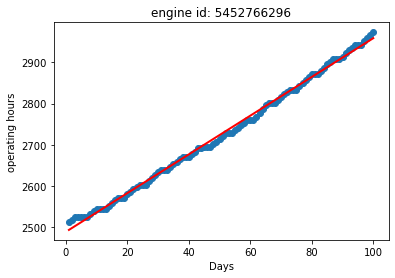

In [24]:
intercept=results.params[0];
slop=results.params[1];
y=df['operating_hours'];
x1=np.arange(1,len(y)+1)
plt.scatter(x1,y);
plt.plot(x1,slop*x1+intercept,lw=2,c='red')
plt.xlabel('Days')
plt.ylabel('operating hours')
plt.title('engine id: '+str(k))
plt.show()
f1=pd.DataFrame({});
f1['time']=['30-03-2018','31-03-2018','01-04-2018','02-04-2018','03-04-2018','04-04-2018','05-04-2018','06-04-2018','07-04-2018','08-04-2018'
,'09-04-2018','10-04-2018','11-04-2018','12-04-2018','13-04-2018']
X_forecast=np.arange(x1[-1],x1[-1]+15);
f1['operation_hour']=X_forecast*slop+intercept
f1['engine_id']=k
forecast=forecast.append(f1,ignore_index=True)

# forecast for engine_id 5452799400

In [25]:
k=keys[13]
print('engine_id '+str(k))
df=groups.get_group(k)
y=df['operating_hours'];
x1=np.arange(1,len(y)+1);
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

engine_id 5452799400


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        operating_hours   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.553e+30
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        05:51:24   Log-Likelihood:                 2492.1
No. Observations:                 100   AIC:                            -4980.
Df Residuals:                      98   BIC:                            -4975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.033e+04   7.41e-13   1.39e+16      0.000    1.03e+04    1.03e+04
x1            30.0000   1.27e-14   2.36e+15      0.000      30.000      30.000
==============================================================================
Omnibus:                      498.152   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.500
Skew:                           0.000   Prob(JB):                     7.19e-09
Kurtosis:                       0.000   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

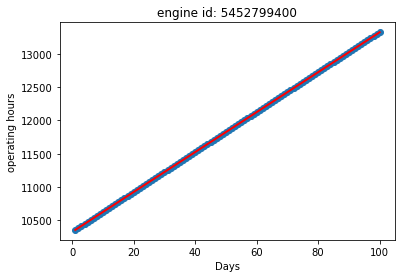

In [26]:
intercept=results.params[0];
slop=results.params[1];
y=df['operating_hours'];
x1=np.arange(1,len(y)+1)
plt.scatter(x1,y);
plt.plot(x1,slop*x1+intercept,lw=2,c='red')
plt.xlabel('Days')
plt.ylabel('operating hours')
plt.title('engine id: '+str(k))
plt.show()
f1=pd.DataFrame({});
f1['time']=['30-03-2018','31-03-2018','01-04-2018','02-04-2018','03-04-2018','04-04-2018','05-04-2018','06-04-2018','07-04-2018','08-04-2018'
,'09-04-2018','10-04-2018','11-04-2018','12-04-2018','13-04-2018']
X_forecast=np.arange(x1[-1],x1[-1]+15);
f1['operation_hour']=X_forecast*slop+intercept
f1['engine_id']=k
forecast=forecast.append(f1,ignore_index=True)

# forecast for engine_id 5687959787

In [27]:
k=keys[14]
print('engine_id '+str(k))
df=groups.get_group(k)
y=df['operating_hours'];
x1=np.arange(1,len(y)+1);
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

engine_id 5687959787


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        operating_hours   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.772e+04
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          1.47e-128
Time:                        05:51:24   Log-Likelihood:                -411.17
No. Observations:                 100   AIC:                             826.3
Df Residuals:                      98   BIC:                             831.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3907.4503      3.007   1299.411      0.000    3901.483    3913.418
x1            10.0406      0.052    194.221      0.000       9.938      10.143
==============================================================================
Omnibus:                       17.050   Durbin-Watson:                   0.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.605
Skew:                           0.914   Prob(JB):                     3.36e-05
Kurtosis:                       4.265   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

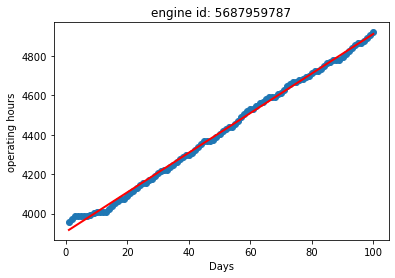

In [28]:
intercept=results.params[0];
slop=results.params[1];
y=df['operating_hours'];
x1=np.arange(1,len(y)+1)
plt.scatter(x1,y);
plt.plot(x1,slop*x1+intercept,lw=2,c='red')
plt.xlabel('Days')
plt.ylabel('operating hours')
plt.title('engine id: '+str(k))
plt.show()
f1=pd.DataFrame({});
f1['time']=['30-03-2018','31-03-2018','01-04-2018','02-04-2018','03-04-2018','04-04-2018','05-04-2018','06-04-2018','07-04-2018','08-04-2018'
,'09-04-2018','10-04-2018','11-04-2018','12-04-2018','13-04-2018']
X_forecast=np.arange(x1[-1],x1[-1]+15);
f1['operation_hour']=X_forecast*slop+intercept
f1['engine_id']=k
forecast=forecast.append(f1,ignore_index=True)

# forcast for engine_id 7133245688

In [29]:
k=keys[15]
print('engine_id '+str(k))
df=groups.get_group(k)
y=df['operating_hours'];
x1=np.arange(1,len(y)+1);
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

engine_id 7133245688


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        operating_hours   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     6251.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.40e-90
Time:                        05:51:25   Log-Likelihood:                -525.62
No. Observations:                 100   AIC:                             1055.
Df Residuals:                      98   BIC:                             1060.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8055.5552      9.444    852.949      0.000    8036.813    8074.297
x1            12.8367      0.162     79.062      0.000      12.515      13.159
==============================================================================
Omnibus:                        9.783   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.131
Skew:                           0.670   Prob(JB):                       0.0104
Kurtosis:                       2.373   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

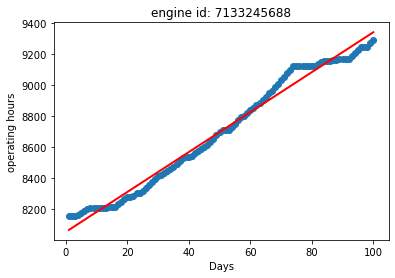

In [30]:
intercept=results.params[0];
slop=results.params[1];
y=df['operating_hours'];
x1=np.arange(1,len(y)+1)
plt.scatter(x1,y);
plt.plot(x1,slop*x1+intercept,lw=2,c='red')
plt.xlabel('Days')
plt.ylabel('operating hours')
plt.title('engine id: '+str(k))
plt.show()
f1=pd.DataFrame({});
f1['time']=['30-03-2018','31-03-2018','01-04-2018','02-04-2018','03-04-2018','04-04-2018','05-04-2018','06-04-2018','07-04-2018','08-04-2018'
,'09-04-2018','10-04-2018','11-04-2018','12-04-2018','13-04-2018']
X_forecast=np.arange(x1[-1],x1[-1]+15);
f1['operation_hour']=X_forecast*slop+intercept
f1['engine_id']=k
forecast=forecast.append(f1,ignore_index=True)

# forecast for engine_id 7940559597

In [31]:
k=keys[16]
print('engine_id '+str(k))
df=groups.get_group(k)
y=df['operating_hours'];
x1=np.arange(1,len(y)+1);
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

engine_id 7940559597


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        operating_hours   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.130e+04
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          4.97e-103
Time:                        05:51:25   Log-Likelihood:                -418.50
No. Observations:                 100   AIC:                             841.0
Df Residuals:                      98   BIC:                             846.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4015.0006      3.236   1240.815      0.000    4008.579    4021.422
x1             5.9129      0.056    106.292      0.000       5.802       6.023
==============================================================================
Omnibus:                       17.499   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.176
Skew:                           0.939   Prob(JB):                     2.52e-05
Kurtosis:                       4.247   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

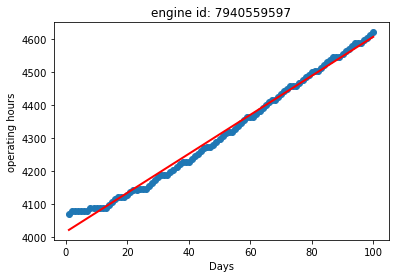

In [32]:
intercept=results.params[0];
slop=results.params[1];
y=df['operating_hours'];
x1=np.arange(1,len(y)+1)
plt.scatter(x1,y);
plt.plot(x1,slop*x1+intercept,lw=2,c='red')
plt.xlabel('Days')
plt.ylabel('operating hours')
plt.title('engine id: '+str(k))
plt.show()
f1=pd.DataFrame({});
f1['time']=['30-03-2018','31-03-2018','01-04-2018','02-04-2018','03-04-2018','04-04-2018','05-04-2018','06-04-2018','07-04-2018','08-04-2018'
,'09-04-2018','10-04-2018','11-04-2018','12-04-2018','13-04-2018']
X_forecast=np.arange(x1[-1],x1[-1]+15);
f1['operation_hour']=X_forecast*slop+intercept
f1['engine_id']=k
forecast=forecast.append(f1,ignore_index=True)

# forecast for engine_id 8331744407

In [33]:
k=keys[17]
print('engine_id '+str(k))
df=groups.get_group(k)
y=df['operating_hours'];
x1=np.arange(1,len(y)+1);
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

engine_id 8331744407


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        operating_hours   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     6274.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           2.37e-91
Time:                        05:51:26   Log-Likelihood:                -556.32
No. Observations:                 101   AIC:                             1117.
Df Residuals:                      99   BIC:                             1122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3638.7400     12.087    301.035      0.000    3614.756    3662.724
x1            16.2979      0.206     79.208      0.000      15.890      16.706
==============================================================================
Omnibus:                       31.586   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.713
Skew:                          -1.500   Prob(JB):                     4.36e-11
Kurtosis:                       4.528   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

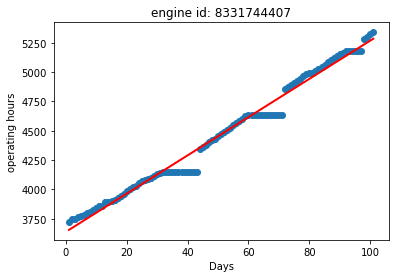

In [34]:
intercept=results.params[0];
slop=results.params[1];
y=df['operating_hours'];
x1=np.arange(1,len(y)+1)
plt.scatter(x1,y);
plt.plot(x1,slop*x1+intercept,lw=2,c='red')
plt.xlabel('Days')
plt.ylabel('operating hours')
plt.title('engine id: '+str(k))
plt.show()
f1=pd.DataFrame({});
f1['time']=['30-03-2018','31-03-2018','01-04-2018','02-04-2018','03-04-2018','04-04-2018','05-04-2018','06-04-2018','07-04-2018','08-04-2018'
,'09-04-2018','10-04-2018','11-04-2018','12-04-2018','13-04-2018']
X_forecast=np.arange(x1[-1],x1[-1]+15);
f1['operation_hour']=X_forecast*slop+intercept
f1['engine_id']=k
forecast=forecast.append(f1,ignore_index=True)

# forecast for engine_id 8481959000

In [35]:
k=keys[18]
print('engine_id '+str(k))
df=groups.get_group(k)
y=df['operating_hours'];
x1=np.arange(1,len(y)+1);
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

engine_id 8481959000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        operating_hours   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     2426.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           6.10e-71
Time:                        05:51:26   Log-Likelihood:                -424.50
No. Observations:                 100   AIC:                             853.0
Df Residuals:                      98   BIC:                             858.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2728.8503      3.436    794.277      0.000    2722.032    2735.668
x1             2.9089      0.059     49.250      0.000       2.792       3.026
==============================================================================
Omnibus:                        6.151   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                5.505
Skew:                           0.497   Prob(JB):                       0.0638
Kurtosis:                       2.423   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

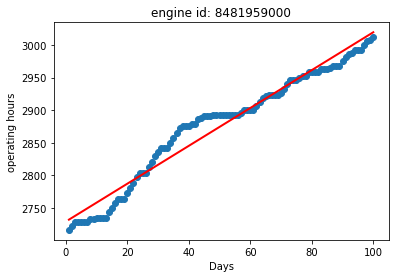

In [36]:
intercept=results.params[0];
slop=results.params[1];
y=df['operating_hours'];
x1=np.arange(1,len(y)+1)
plt.scatter(x1,y);
plt.plot(x1,slop*x1+intercept,lw=2,c='red')
plt.xlabel('Days')
plt.ylabel('operating hours')
plt.title('engine id: '+str(k))
plt.show()
f1=pd.DataFrame({});
f1['time']=['30-03-2018','31-03-2018','01-04-2018','02-04-2018','03-04-2018','04-04-2018','05-04-2018','06-04-2018','07-04-2018','08-04-2018'
,'09-04-2018','10-04-2018','11-04-2018','12-04-2018','13-04-2018']
X_forecast=np.arange(x1[-1],x1[-1]+15);
f1['operation_hour']=X_forecast*slop+intercept
f1['engine_id']=k
forecast=forecast.append(f1,ignore_index=True)

# forecast operating hour for those engines having constant operating hour value after some days

In [37]:
n=[0,3,4,5,8,10,11,12,19];
print("this engine has constant operating hours in forecast days")
for i in n:
    print(keys[i])

this engine has constant operating hours in forecast days
2159359786
3308150982
3413759796
3643747759
5246759857
5452799100
5452799200
5452799300
8711753003


In [38]:
for i in n: 
    k=keys[i]
    print('engine_id '+str(k))
    df=groups.get_group(k)
    y=df['operating_hours'];
    y=np.array(y)
    constant_value=y[-1];

    f1=pd.DataFrame({});
    f1['time']=['30-03-2018','31-03-2018','01-04-2018','02-04-2018','03-04-2018','04-04-2018','05-04-2018','06-04-2018','07-04-2018','08-04-2018'
    ,'09-04-2018','10-04-2018','11-04-2018','12-04-2018','13-04-2018']
    f1['operation_hour']=constant_value;
    f1['engine_id']=k
    forecast=forecast.append(f1,ignore_index=True)

engine_id 2159359786
engine_id 3308150982
engine_id 3413759796
engine_id 3643747759
engine_id 5246759857
engine_id 5452799100
engine_id 5452799200
engine_id 5452799300
engine_id 8711753003


In [39]:
forecast.to_csv("F://challenge_data_20_forecast.csv")

In [40]:
forecast.describe()

,operation_hour,engine_id
count,300.000000,3.000000e+02
mean,5327.293374,5.249006e+09
std,3960.316128,1.986479e+09
min,645.000000,2.159360e+09
25%,2489.000000,3.586251e+09
50%,4219.500000,5.452783e+09
75%,7379.411427,6.049281e+09
max,13746.000000,8.711753e+09
